In [1]:
import os
import re
import statistics
import pandas as pd

In [2]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

In [3]:
df = pd.read_parquet(os.path.join('data/cnb_sloupce','008.parquet'))

In [4]:
sloupce = ['leader']

In [5]:
for s in sloupce:
    pripojit = pd.read_parquet(os.path.join("data/cnb_sloupce",f"{s}.parquet"))
    df = df.merge(pripojit, left_index=True, right_index=True, how="left")

In [6]:
df = df.explode('008')

In [7]:
df = df[(df["008"].str[15:17] == "xr") & (df["008"].str[35:38] == "cze")]

In [8]:
df = df.explode("leader")

In [9]:
df = df[df["leader"].str[6].isin(["a", "t"])]

In [10]:
df = df[~df["leader"].str[7].isin(["b", "i", "s", " "])]

In [11]:
sloupce = ['245','655','072','100','041','964','080']

In [12]:
for s in sloupce:
    pripojit = pd.read_parquet(os.path.join("data/cnb_sloupce",f"{s}.parquet"))
    df = df.merge(pripojit, left_index=True, right_index=True, how="left")

In [13]:
def najdi_rok(nn8):
    if nn8[6] in ['s', 't', 'd', 'm', 'e', 'c','u', 'r']:
        try:
            return int(nn8[7:11])
        except Exception as e:
            return None
        else:
            return None
    elif nn8[6] == 'q':
        try:
            rok1 = int(nn8[7:11])
            rok2 = int(nn8[11:15])
            if rok2 - rok1 <= 5:
                return int(statistics.median([rok1, rok2]))
            else:
                return None
        except:
            return None
    else:
        return None

In [14]:
def r(x):
    return x.groupby('rok').size().plot.bar(figsize=(25,5))

In [15]:
df['rok'] = df['008'].apply(lambda x: najdi_rok(x))

In [16]:
df = df.dropna(subset=["rok"])

In [17]:
df['rok']

001
ck8300078         1982.0
ck8300080         1983.0
ck8300081         1982.0
ck8300082         1981.0
ck8300083         1982.0
                   ...  
nkc20243644767    2024.0
nkc20243644768    2024.0
nkc20243644769    2024.0
nkc20243644770    2024.0
nkc20243644771    2024.0
Name: rok, Length: 884425, dtype: float64

In [18]:
df = df.dropna(subset=['245_a','100_a'])
df['titul'] = df['245_a'].apply(lambda x: x[:-1].strip() if x[-1] in [':','/',';','=','.'] else x.strip())

In [19]:
df = df.sort_values(by="rok")

In [20]:
df[df['100_7'].astype(str).str.contains('jk01072915',na=False)]

,008,leader,245_ind1,245_ind2,245_a,245_b,245_c,245_n,245_p,245_h,245_f,245_s,655_ind2,655_a,655_7,655_2,655_ind1,655_x,655_z,655_y,072_ind2,072_a,072_x,072_2,072_9,100_ind1,100_a,100_7,100_4,100_d,100_q,100_c,100_b,100_e,041_ind1,041_a,041_h,041_b,041_k,041_g,041_f,041_d,041_e,041_j,041_n,041_ind2,041_m,964_a,080_a,080_2,080_x,080_9,080_ind1,rok,titul
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
cpk20041417516,040923s1836 xr e 000 p cze,nam a22 a 4500,1,0,Mág :,báseň od Karla Hynka Máchy,None,None,None,None,None,None,[7],[česká poezie],[fd133958],[czenas],None,None,None,None,[7],[821.162.3-1],[Česká poezie],[Konspekt],[25],1,"Mácha, Karel Hynek,",jk01072915,[aut],1810-1836,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[821.162.3-1],[MRF],None,None,None,1836.0,Mág
cpk20051497973,050128s1845 xr e 000 macze,nam a22 a 4500,1,0,Básně.,None,[napsal Karel Hynek Mácha],[Díl první /],None,None,None,None,"[7, 7, 7, 7, 7]","[česká poezie, studie, deníky, korespondence, ...","[fd133958, fd133597, fd132006, fd132681, fd133...","[czenas, czenas, czenas, czenas, czenas]",None,None,None,None,[7],[821.162.3-1],[Česká poezie],[Konspekt],[25],1,"Mácha, Karel Hynek,",jk01072915,[aut],1810-1836,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[929, 821.162.3-051, 821.162.3-1, (048.8), (09...","[MRF, MRF, MRF, MRF, MRF, MRF, MRF]",None,None,None,1845.0,Básně
cpk20142538381,140106s1857 xr ||| | cze,nam a22 a 4500,1,0,Cikáni /,None,román z pozůstalých spisů Karla Hynka Máchy,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"Mácha, Karel Hynek,",jk01072915,[aut],1810-1836,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1857.0,Cikáni
cpk20132508470,131021s1862 xr e 000 p cze,nam a22 aa4500,1,0,Spisy Karla Hynka Máchy,None,None,None,None,None,None,None,"[7, 7, 7]","[poezie, české romány, české povídky]","[fd131936, fd133974, fd133971]","[czenas, czenas, czenas]",None,None,None,None,[7],[821.162.3-1],[Česká poezie],[Konspekt],[25],1,"Mácha, Karel Hynek,",jk01072915,[aut],1810-1836,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[821.162.3-31, 821.162.3-32, (0:82-31), (0:82-...","[MRF, MRF, MRF, MRF]",None,None,None,1862.0,Spisy Karla Hynka Máchy
cpk20040315951,040512q18651866xr a e 000 p cze,nam a22 a 4500,1,0,Máj /,None,báseň romantická od Karla Hynka Máchy ; illust...,None,None,None,None,None,[7],[česká poezie],[fd133958],[czenas],None,None,None,None,[7],[821.162.3-1],[Česká poezie],[Konspekt],[25],1,"Mácha, Karel Hynek,",jk01072915,[aut],1810-1836,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[821.162.3-1, (0:82-1)]","[MRF, MRF]",None,None,None,1865.0,Máj
nkc20081815810,080814s1869 xr e 000 j cze,nam a22 a 4500,1,0,Cikáni /,None,K.H. Mácha ... ; [autografoval Adolf Hanel],None,None,None,None,None,[7],[české prózy],[fd133972],[czenas],None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Mácha, Karel Hynek,",jk01072915,[aut],1810-1836,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[821.162.3-3, (0:82-3)]","[MRF, MRF]",None,None,None,1869.0,Cikáni
nkc20081815811,080814s1869 xr e 000 p cze,nam a22 a 4500,1,0,Spisy K.H. Máchy /,None,... [autografoval Adolf Hanel],None,None,None,None,None,[7],[česká poezie],[fd133958],[czenas],None,None,None,None,[7],[821.162.3-1],[Česká poezie],[Konspekt],[25],1,"Mácha, Karel Hynek,",jk01072915,[aut],1810-1836,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[821.162.3-1, (0:82-1)]","[MRF, MRF]",None,None,None,1869.0,Spisy K.H. Máchy
cpk20021037313,020117s1872 xr a e 000 p cze,nam a22 a 4500,1,0,Máj :,báseň romantická od Karla Hynka Máchy /,ilustroval Jos. Scheiwl ; ryl J.F. Patočka,None,None,None,None,None,[7],[česká poezie],[fd133958],[czenas],None,None,None,None,[7],[821.162.3-1],[Česká poezie],[Konspekt],[25],1,"Mácha, Karel Hynek,",jk01

In [21]:
df[df['titul'] == 'Šokovaná růže']

,008,leader,245_ind1,245_ind2,245_a,245_b,245_c,245_n,245_p,245_h,245_f,245_s,655_ind2,655_a,655_7,655_2,655_ind1,655_x,655_z,655_y,072_ind2,072_a,072_x,072_2,072_9,100_ind1,100_a,100_7,100_4,100_d,100_q,100_c,100_b,100_e,041_ind1,041_a,041_h,041_b,041_k,041_g,041_f,041_d,041_e,041_j,041_n,041_ind2,041_m,964_a,080_a,080_2,080_x,080_9,080_ind1,rok,titul
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bk196904868,971206s1969 xr ||| | cze,nam a22 1 4500,1,0,Šokovaná růže /,None,Oldřich Mikulášek,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"Mikulášek, Oldřich,",jk01081628,[aut],1910-1985,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[885-14],[undef],None,None,None,1969.0,Šokovaná růže
bk197002645,970502s1970 xr ||| | cze,nam a22 1 4500,1,0,Šokovaná růže /,None,Oldřich Mikulášek,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"Mikulášek, Oldřich,",jk01081628,[aut],1910-1985,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[885-14],[undef],None,None,None,1970.0,Šokovaná růže


In [22]:
df[df['072_x'].astype(str).str.lower().str.lower().str.contains('verše',na=False)]

,008,leader,245_ind1,245_ind2,245_a,245_b,245_c,245_n,245_p,245_h,245_f,245_s,655_ind2,655_a,655_7,655_2,655_ind1,655_x,655_z,655_y,072_ind2,072_a,072_x,072_2,072_9,100_ind1,100_a,100_7,100_4,100_d,100_q,100_c,100_b,100_e,041_ind1,041_a,041_h,041_b,041_k,041_g,041_f,041_d,041_e,041_j,041_n,041_ind2,041_m,964_a,080_a,080_2,080_x,080_9,080_ind1,rok,titul
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [23]:
df[df['072_x'].astype(str).str.lower().str.contains('česká poezie',na=False)]

,008,leader,245_ind1,245_ind2,245_a,245_b,245_c,245_n,245_p,245_h,245_f,245_s,655_ind2,655_a,655_7,655_2,655_ind1,655_x,655_z,655_y,072_ind2,072_a,072_x,072_2,072_9,100_ind1,100_a,100_7,100_4,100_d,100_q,100_c,100_b,100_e,041_ind1,041_a,041_h,041_b,041_k,041_g,041_f,041_d,041_e,041_j,041_n,041_ind2,041_m,964_a,080_a,080_2,080_x,080_9,080_ind1,rok,titul
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
cpk20051527410,050317s1802 xr e 000 pdcze,nam a22 a 4500,1,0,"Pjseň Pánu, Panu Jozefowi Wimmrowi, Wlastency ...",na důkaz wážnosti a ssetrnosti obětowána od F....,None,None,None,None,None,None,[7],[česká poezie],[fd133958],[czenas],None,None,None,None,[7],[821.162.3-1],[Česká poezie],[Konspekt],[25],0,"S...a, F.",None,[aut],None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[821.162.3-1],[MRF],None,None,None,1802.0,"Pjseň Pánu, Panu Jozefowi Wimmrowi, Wlastency ..."
bknvla04792,041025s1802 xr e 000 p cze,nam a22 1i 4500,1,0,Nowé básně.,None,wydané od Antonjna Puchmayera,[Swazek prwnj /],None,None,None,None,[7],[česká poezie],[fd133958],[czenas],None,None,None,None,[7],[821.162.3-1],[Česká poezie],[Konspekt],[25],1,"Puchmajer, Antonín Jaroslav,",jk01101689,[aut],1769-1820,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[821.162.3-1, (0:82-1)]","[MRF, MRF]",None,None,None,1802.0,Nowé básně
nkc20061639418,060123s1803 xr e 000 p cze,nam a22 a 4500,1,0,Spěw Kwerků Kuttnohorských wzbuzugicý k pawowá...,cýsařsko-králowskému Hornjmu Auřadu obětowaný ...,složený od Frantisska Wawáka ; a w hudbu čtyřh...,None,None,None,None,None,"[7, 7]","[česká poezie, jubilejní publikace]","[fd133958, fd131839]","[czenas, czenas]",None,None,None,None,[7],[821.162.3-1],[Česká poezie],[Konspekt],[25],1,"Vavák, František Jan,",jk01141705,[aut],1741-1816,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[821.162.3-1, (437.312), (082.2)]","[MRF, MRF, MRF]",None,None,None,1803.0,Spěw Kwerků Kuttnohorských wzbuzugicý k pawowá...
bknhak08849,030503s1804 xr e 000 p cze,nam a22 1 4500,1,0,Poslednj Saud /,None,složený od Wogtěcha Negedlého,None,None,None,None,None,[7],[česká poezie],[fd133958],[czenas],None,None,None,None,[7],[821.162.3-1],[Česká poezie],[Konspekt],[25],1,"Nejedlý, Vojtěch,",jk01082969,[aut],1772-1844,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[821.162.3-1, (0:82-1)]","[MRF, MRF]",None,None,None,1804.0,Poslednj Saud
cpk20051500789,050222s1804 xr e 000 pdcze,nam a22 a 4500,1,0,[Přehrozné se mračno hnalo ... /,None,František Jan Tomsa],None,None,None,None,None,[7],[česká poezie],[fd133958],[czenas],None,None,None,None,[7],[821.162.3-1],[Česká poezie],[Konspekt],[25],1,"Tomsa, František Jan,",jk01132744,[aut],1753-1814,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[821.162.3-1, 929.7-055.2, (437.3)]","[MRF, MRF, MRF]",None,None,None,1804.0,[Přehrozné se mračno hnalo ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nkc20243604844,240509s2024 xr g 000 p cze,nam a22 i 4500,1,0,Veselý mručoun v zajetí koček /,None,Eva Menzelová,None,None,None,None,None,"[7, 9]","[česká poezie, Czech poetry]","[fd133958, None]","[czenas, eczenas]",None,None,None,None,[7],[821.162.3-1],[Česká poezie],[Konspekt],[25],0,Veselý mručoun,ola2015858227,[aut],None,None,[(básnířka)],None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[821.162.3-1, (0:82-1)]","[MRF, MRF]",None,None,None,2024.0,Veselý mručoun v zajetí koček
nkc20243605534,240510s2024 xr a g 000 p cze,nam a22 i 4500,1,0,Tajný život Fryderyka Chopina :,"(Chopin, který není...) /",Martin Petiška,None,None,None,None,None,"[7, 7, 9, 9]","[česká poezie, obrazové publikace, Czech poetr...","[fd133958, fd132947, None, None]","[czenas, czenas, eczenas, eczenas]",None,None,None,N

In [24]:
ceska_poezie = df[
    df['072_x'].astype(str).str.lower().str.contains('česká poezie',na=False)
    | df['072_a'].astype(str).str.lower().str.contains('821.162.3-1',na=False)
    | df['080_a'].astype(str).str.contains('821.162.3-1',na=False)
    | df['080_a'].astype(str).str.contains('885-14',na=False)
    | df['655_a'].astype(str).str.lower().str.contains('česká poezie', na=False)
    
]
ceska_poezie = ceska_poezie[ceska_poezie['100_a'].notnull()]
ceska_poezie['autorstvo'] = ceska_poezie['100_a'].apply(lambda x: x.replace(',','') if x != None else None)
ceska_poezie2 = ceska_poezie.sort_values(by='rok').drop_duplicates(subset=['titul','autorstvo'], keep='first')

In [25]:
ceska_poezie2[ceska_poezie2['rok'] < 1915][['rok','titul','autorstvo']].sample(20)

,rok,titul,autorstvo
001,,,
cpk20051568846,1898.0,Pestré zpěvy,Tomek Vratislav Václav
bknkst01494,1897.0,Podrobný seznam slov Rukopisu Kralodvorského s...,Flajšhans Václav
cpk20021161194,1891.0,Z výstavních táček,Kvapil František
cpk20051500302,1858.0,Písně a balády,Lešetický Vojtěch
cpk20193147511,1909.0,Na zlatých strunách,Frabša František S.
bknjaj12146,1888.0,Básně Ferd. P. Místeckého,Pěčka Místecký Ferdinand
nkc20081829961,1868.0,Na den položení základního kamene 16. května 1868,Pok Poděbradský Václav
nkc20071712892,1893.0,Pražské motivy,Klášterský Antonín
bknben06897,1909.0,Dvě knihy veršů,Sládek Josef Václav


In [26]:
df[df['245_a'].astype(str).str.contains('Šokovaná růže')]

,008,leader,245_ind1,245_ind2,245_a,245_b,245_c,245_n,245_p,245_h,245_f,245_s,655_ind2,655_a,655_7,655_2,655_ind1,655_x,655_z,655_y,072_ind2,072_a,072_x,072_2,072_9,100_ind1,100_a,100_7,100_4,100_d,100_q,100_c,100_b,100_e,041_ind1,041_a,041_h,041_b,041_k,041_g,041_f,041_d,041_e,041_j,041_n,041_ind2,041_m,964_a,080_a,080_2,080_x,080_9,080_ind1,rok,titul
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bk196904868,971206s1969 xr ||| | cze,nam a22 1 4500,1,0,Šokovaná růže /,None,Oldřich Mikulášek,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"Mikulášek, Oldřich,",jk01081628,[aut],1910-1985,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[885-14],[undef],None,None,None,1969.0,Šokovaná růže
bk197002645,970502s1970 xr ||| | cze,nam a22 1 4500,1,0,Šokovaná růže /,None,Oldřich Mikulášek,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"Mikulášek, Oldřich,",jk01081628,[aut],1910-1985,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[885-14],[undef],None,None,None,1970.0,Šokovaná růže


In [27]:
ceska_poezie2[ceska_poezie2['autorstvo'] == 'Skácel Jan'][['rok','titul','autorstvo']]

,rok,titul,autorstvo
001,,,
bk515500222,1955.0,Kaštany padají,Skácel Jan
bk195703911,1957.0,Kolik příležitostí má růže,Skácel Jan
bk196003510,1960.0,Co zbylo z anděla,Skácel Jan
bk196101204,1961.0,Jak šel brousek na vandr,Skácel Jan
bk196101329,1961.0,Pohádka o velikém samovaru,Skácel Jan
bk196204607,1962.0,Hodina mezi psem a vlkem,Skácel Jan
bk196500660,1964.0,Návraty,Skácel Jan
bk196503453,1965.0,Smuténka,Skácel Jan
bk196605103,1966.0,Český brevíř lásky,Skácel Jan


In [28]:
ceska_poezie2[ceska_poezie2['autorstvo'] == 'Mikulášek Oldřich'][['rok','titul','autorstvo']]

,rok,titul,autorstvo
001,,,
bk194002378,1940.0,Marné milování,Mikulášek Oldřich
bk515500200,1955.0,Divoké kačeny,Mikulášek Oldřich
bk195703907,1957.0,Krajem táhne prašivec,Mikulášek Oldřich
cpk20132499416,1958.0,Taneční fantasie,Mikulášek Oldřich
bk196000331,1959.0,Běžící luna,Mikulášek Oldřich
bk195902679,1959.0,Ortely a milosti,Mikulášek Oldřich
bk195906151,1959.0,První obrázky,Mikulášek Oldřich
bk196002591,1960.0,Orchestr v korunách,Mikulášek Oldřich
bk196303817,1963.0,Svlékání hadů,Mikulášek Oldřich


In [29]:
ceska_poezie2[['rok','titul','autorstvo']].sample(20)

,rok,titul,autorstvo
001,,,
cpk20051410557,2004.0,Nenasytné sítě,Slabý Ondřej
nkc20091867995,2009.0,Chvilky s poezií,Kučera Zdeněk H.
cpk20031243696,1989.0,Čtveročas Vysočiny,Klang Miloš
nkc20071746475,1892.0,Rezedky,Krásnohorská Eliška
nkc20183009324,2018.0,Zazněl gong,Christen Helena
nkc20081822380,2008.0,Živý jako nikdo z nás,Scheinpflugová Olga
nkc20193156066,2018.0,Jen srdcem,Brož Josef
nkc20081836255,2008.0,Ponechám si něžnou vzpomínku,Tarkó Helena Marie
bknaus11577,1913.0,Navarov,Tuhaňská Jiřina


<Axes: xlabel='rok'>

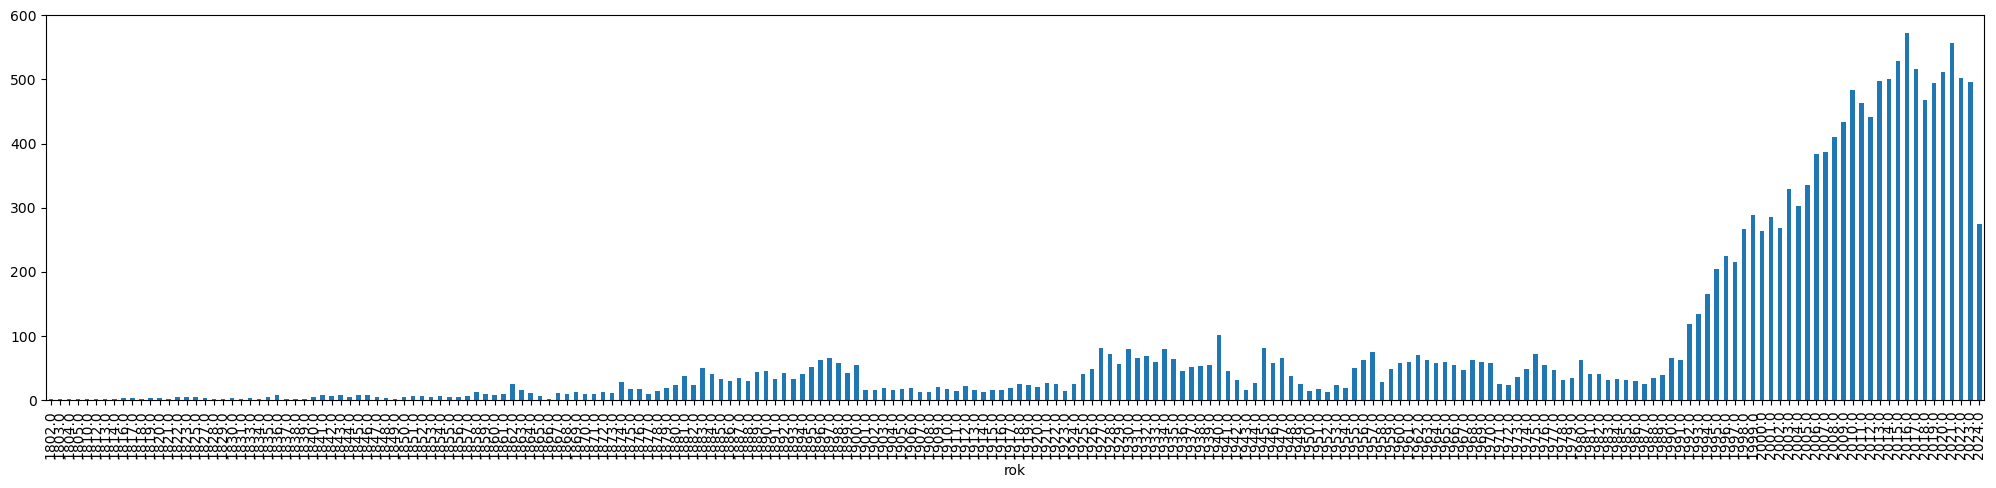

In [30]:
r(ceska_poezie2)

In [31]:
len(ceska_poezie2)

17335

In [32]:
ceska_poezie2[['rok','titul','autorstvo','100_7']].to_parquet(os.path.join("data","cnb_ceska_poezie.parquet"))